# Clase 5: Ejemplos de distribuciones y ajustes básicos

Prof. Tito Homem-de-Mello

In [ ]:
#install.packages('fitdistrplus')

In [ ]:
library(fitdistrplus)


### Gamma

In [ ]:
plot(function(x) dgamma(x,shape=3,scale=3),0,50,ylim=c(0,0.1),col=2,ylab="densidad Gamma")

### Beta

In [ ]:
plot(function(x) dbeta(x,shape1=2,shape2=4),0,1,ylim=c(0,5),col=2,ylab="densidad Beta")

### Lognormal

In [ ]:
plot(function(x) dlnorm(x,meanlog=2,sdlog=2),0,50,ylim=c(0,0.15),col=2,ylab="densidad Lognormal")

### Weibull

In [ ]:
plot(function(x) dweibull(x,shape=1.5,scale=4),0,10,ylim=c(0,0.3),col=2,ylab="densidad Weibull")

### Exponencial

In [ ]:
plot(function(x) dexp(x, rate=3),0,3,ylim=c(0,3),col=2,ylab="densidad Exponencial")

# Ajustando distribuciones a los datos

### Empecemos por mirar los datos:

In [1]:
#install.packages('data.table')
library("data.table")

In [3]:
data <- fread("winequality-red.csv")
head(data)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [4]:
names(data)[names(data)=="fixed acidity"] <- "Acidity"
data$Acidity

[1]  7.4  7.8  7.8 11.2  7.4  7.4  7.9  7.3  7.8  7.5  6.7  7.5  5.6  7.8
  [15]  8.9  8.9  8.5  8.1  7.4  7.9  8.9  7.6  7.9  8.5  6.9  6.3  7.6  7.9
  [29]  7.1  7.8  6.7  6.9  8.3  6.9  5.2  7.8  7.8  8.1  5.7  7.3  7.3  8.8
  [43]  7.5  8.1  6.8  4.6  7.7  8.7  6.4  5.6  8.8  6.6  6.6  8.6  7.6  7.7
  [57] 10.2  7.5  7.8  7.3  8.8  7.7  7.5  7.0  7.2  7.2  7.5  6.6  9.3  8.0
  [71]  7.7  7.7  7.7  8.3  9.7  8.8  8.8  6.8  6.7  8.3  6.2  7.8  7.4  7.3
  [85]  6.3  6.9  8.6  7.7  9.3  7.0  7.9  8.6  8.6  7.7  5.0  4.7  6.8  7.0
  [99]  7.6  8.1  8.3  7.8  8.1  8.1  7.2  8.1  7.8  6.2  8.0  8.1  7.8  8.4
 [113]  8.4 10.1  7.8  9.4  8.3  7.8  8.8  7.0  7.3  8.8  7.3  8.0  7.8  9.0
 [127]  8.2  8.1  8.0  6.1  8.0  5.6  5.6  6.6  7.9  8.4  8.3  7.2  7.8  7.8
 [141]  8.4  8.3  5.2  6.3  5.2  8.1  5.8  7.6  6.9  8.2  7.3  9.2  7.5  7.5
 [155]  7.1  7.1  7.1  7.1  7.1  6.8  7.6  7.6  7.8  7.4  7.3  7.8  6.8  7.3
 [169]  6.8  7.5  7.9  8.0  8.0  7.4  7.3  6.9  7.3  7.5  7.0  8.8  8.8  8.9
 [183]  7.2  6.8  6.7  8.9  7.4  7.7  7.9  7.9  8.2  6.4  6.8  7.6  7.6  7.8
 [197]  7.3 11.5  5.4  6.9  9.6  8.8  6.8  7.0  7.0 12.8 12.8  7.8  7.8 11.0
 [211]  9.7  8.0 11.6  8.2  7.8  7.0  8.7  8.1  7.5  7.8  7.8  7.4  6.8  8.6
 [225]  8.4  7.7  8.9  9.0  7.7  6.9  5.2  8.0  8.5  6.9  8.2  7.2  7.2  7.2
 [239]  7.2  8.2  8.9 12.0  7.7 15.0 15.0  7.3  7.1  8.2  7.7  7.3 10.8  7.1
 [253] 11.1  7.7  7.1  8.0  9.4  6.6  7.7 10.0  7.9  7.0  8.0  7.9 12.5 11.8
 [267]  8.1  7.9  6.9 11.5  7.9 11.5 10.9  8.4  7.5  7.9  6.9 11.5 10.3  8.9
 [281] 11.4  7.7  7.6  8.9  9.9  9.9 12.0  7.5  8.7 11.6  8.7 11.0 10.4  6.9
 [295] 13.3 10.8 10.6  7.1  7.2  6.9  7.5 11.1  8.3  7.4  8.4 10.3  7.6 10.3
 [309] 10.3  7.4 10.3  7.9  9.0  8.6  7.4  7.1  9.6  9.6  9.8  9.6  9.8  9.3
 [323]  7.8 10.3 10.0 10.0 11.6 10.3 13.4 10.7 10.2 10.2  8.0  8.4  7.9 11.9
 [337]  8.9  7.8 12.4 12.5 12.2 10.6 10.9 10.9 11.9  7.0  6.6 13.8  9.6  9.1
 [351] 10.7  9.1  7.7 13.5  6.1  6.7 11.5 10.5 11.9 12.6  8.2  8.6 11.9 12.5
 [365] 12.8 10.0 12.8 10.4 10.3  9.4  6.9  7.9  9.1  7.4 14.0 11.5 11.5  9.4
 [379] 11.4  8.3  8.3 13.7  8.3  8.3  7.7  7.4  7.8  8.3  7.8  9.6  5.6 13.7
 [393]  9.5  8.4 12.7 12.0  6.6 11.5 11.5  8.7  6.6  7.7 12.2 11.4  7.7  8.7
 [407]  9.8 12.0 10.4 12.5  9.0  9.1  7.1  9.9  8.8  8.6 10.6  7.0 11.9  6.8
 [421]  9.5  6.6  7.7 10.5  7.7  6.6  6.4  9.5  9.1 12.8 10.5  7.8 11.9 12.3
 [435] 10.4 12.3  8.0 11.1 10.4  7.0 12.6 11.9 15.6 10.0  5.3  9.5 12.5  9.3
 [449]  8.6 11.9 11.9  8.4  6.8 10.4  7.0 11.3  8.9  9.2 10.4 11.6  9.2  8.3
 [463] 11.0  8.1 11.5 10.0 10.3  8.8 11.4  8.7 13.0  9.6 12.5  9.9 10.5  9.6
 [477]  9.3 10.4  9.6  9.4 10.6  9.4 10.6 10.6 10.6 10.2 10.2 10.2 11.6  9.3
 [491]  9.3  9.2  8.9  8.7  6.5 10.7  7.8  7.2 10.7  8.7  7.8 10.4 10.4 10.5
 [505] 10.5 10.2 10.4 11.2 10.0 13.3 12.4 10.0 10.7 10.5 10.5  8.5 12.5 10.4
 [519] 10.9  7.3  9.8  7.6  8.2  9.3  9.2 10.4  7.3  7.0  8.2  9.9  9.1 11.9
 [533] 11.9 10.3 10.0  9.1  9.9  8.1 12.9 11.2  9.2  9.5  9.3 11.2 14.3  9.1
 [547]  7.5 10.6 12.4  9.0  6.8  9.4  9.5  5.0 15.5 15.5 10.9 15.6 10.9 13.0
 [561] 12.7  9.0  9.0  7.6 13.0 12.7  8.7  8.7  9.8  6.2 11.5  6.2 10.2 10.5
 [575] 10.6 12.3  9.9  8.8  8.8 10.6 12.3 12.3 11.7 12.0 11.8  7.6 11.1  7.3
 [589]  5.0 10.2  9.0  6.6  9.0  9.9  7.9  8.9 12.4 11.9  8.5 12.7  8.2 13.2
 [603]  7.7 13.2  8.3  8.3  9.4  8.8 10.1  6.3  8.8 13.2  7.5  8.2  9.2  9.6
 [617]  9.6 11.5 11.4 11.3  8.3  8.2 10.0  7.9  6.8  6.8  8.8  8.8  8.7  7.6
 [631]  8.7 10.4  7.6 10.1  7.9  8.7  9.6  9.5  7.7  8.9  9.9  9.5  9.9  9.5
 [645]  9.9  7.8  7.3  8.3  8.7  6.7 10.7  9.8 15.9  9.4  8.6  9.7 10.7 12.0
 [659]  7.2  7.1  7.2  7.5  7.2 10.1 12.1  9.4  8.3 11.3 10.0 11.3  6.9  8.2
 [673]  9.8  8.2 10.8  9.3 10.8  8.6  8.3 10.8 13.3  8.0  8.5  8.1  9.8  8.1
 [687]  7.1  9.1  7.7  8.1  7.4  9.2  8.6  9.0  9.0  5.1  7.0  7.0  9.4 11.8
 [701] 10.6  7.0  7.0  7.5  9.1  8.4  7.0  7.4  7.8  9.7 10.6  8.9  8.7  8.0
 [715]  9.9  7.2  8.0  7.6  8.4  7.1  8.4  8.9  7.6  7.1  7.5  9.0  8.1  6.4

### Estadísticas descriptivas:

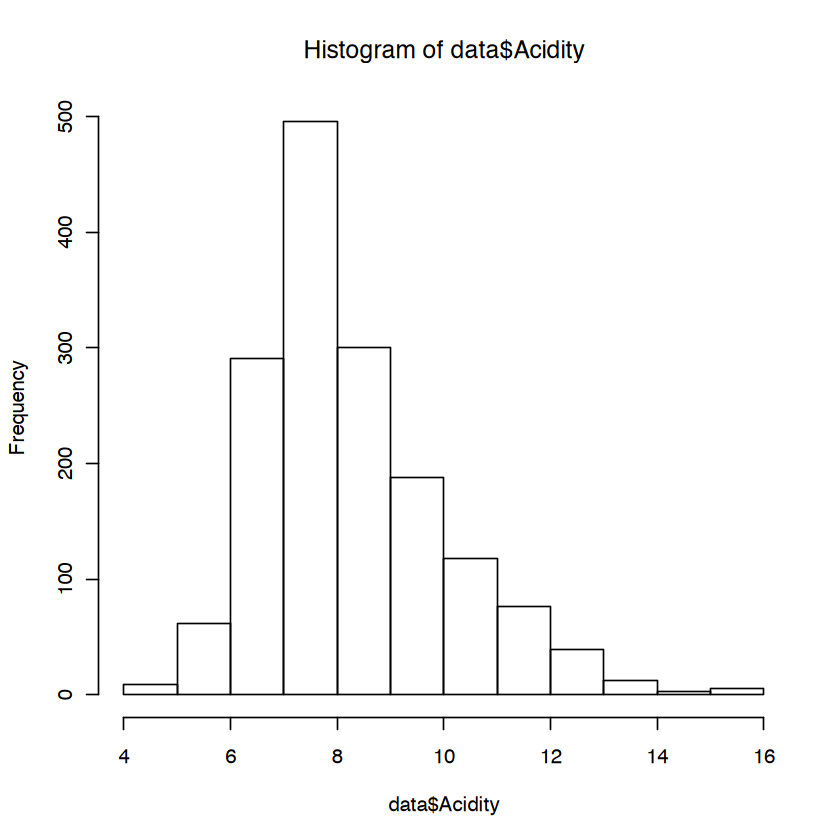

In [6]:
hist(data$Acidity)

In [ ]:
descdist(data$Acidity)

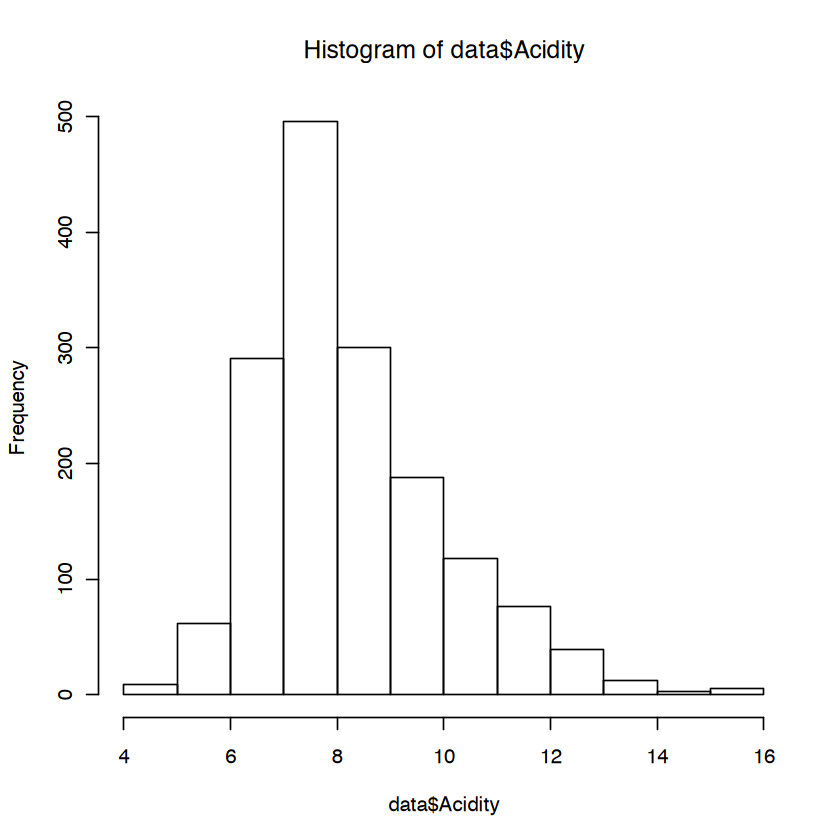

### Ajustemos una Normal

In [ ]:
a_norm <- fitdist(data$Acidity, "norm")
summary(a_norm)

### Ajustemos una Gamma

In [ ]:
a_gamma <- fitdist(data$Acidity, "gamma")
summary(a_gamma)

### Ajustemos una Weibull

In [ ]:
a_weib <- fitdist(data$Acidity, "weibull")
summary(a_weib)

### Ajustemos una Lognormal

In [ ]:
a_lnorm<-fitdist(data$Acidity, "lnorm")
summary(a_lnorm)

### Comparando los ajustes:

In [ ]:
plot.legend <- c("Normal", "Weibull", "Gamma", "Lognormal")
denscomp(list(a_norm,a_weib,a_gamma,a_lnorm), fitcol=c(2,4,6,3), fitlty=1, legendtext=plot.legend)

In [ ]:
cdfcomp(list(a_norm,a_weib,a_gamma,a_lnorm),fitcol=c(2,4,6,3), fitlty=1, legendtext=plot.legend, verticals=T, 
        do.points=F)